<a href="https://colab.research.google.com/github/louis-moon/VisualBooks/blob/main/VisualBooks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mfrashad/text2art/blob/main/text2art.ipynb)

In [1]:
#@title Setup
from google.colab import output

nvidia_output = !nvidia-smi --query-gpu=memory.total --format=noheader,nounits,csv
gpu_memory = int(nvidia_output[0])
if gpu_memory < 14000:
  output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')
  warning_string = f"--> GPU check: ONLY {gpu_memory} MiB available: Please use low quality or low res <--"
  print(warning_string)
  output.eval_js('alert("Warning - low GPU (see message)")')
else:
  print(f"GPU check: {gpu_memory} MiB available: this should be fine")

from IPython.utils import io
with io.capture_output() as captured:
  !pip install torch==1.9.0+cu102 torchtext==0.10.0 torchvision==0.10.0+cu102 torch-optimizer==0.1.0 -f https://download.pytorch.org/whl/torch/ -f https://download.pytorch.org/whl/torchvision/
  !git clone https://github.com/openai/CLIP
  # !pip install taming-transformers
  !git clone https://github.com/CompVis/taming-transformers.git
  !rm -Rf clipit
  !git clone https://github.com/mfrashad/clipit.git
  !pip install ftfy regex tqdm omegaconf pytorch-lightning
  !pip install kornia==0.6.1
  !pip install imageio-ffmpeg
  !pip install einops
  !pip install torch-optimizer
  !pip install easydict
  !pip install braceexpand
  !pip install git+https://github.com/pvigier/perlin-numpy

  # ClipDraw deps
  !pip install svgwrite
  !pip install svgpathtools
  !pip install cssutils
  !pip install numba
  !pip install torch-tools
  !pip install visdom

  !pip install gradio==2.3.7

  !git clone https://github.com/BachiLi/diffvg
  %cd diffvg
  # !ls
  !git submodule update --init --recursive
  !python setup.py install
  %cd ..

  !mkdir -p steps
  !mkdir -p models

output.clear()
import sys
sys.path.append("clipit")

result_msg = "setup complete"
import IPython
import os
if not os.path.isfile("first_init_complete"):
  # put stuff in here that should only happen once
  !mkdir -p models
  os.mknod("first_init_complete")
  result_msg = "Please choose Runtime -> Restart Runtime from the menu, and then run Setup again"

js_code = f'''
document.querySelector("#output-area").appendChild(document.createTextNode("{result_msg}"));
'''
js_code += '''
for (rule of document.styleSheets[0].cssRules){
  if (rule.selectorText=='body') break
}
rule.style.fontSize = '30px'
'''
display(IPython.display.Javascript(js_code))

<IPython.core.display.Javascript object>

## VQGAN + CLIP

  and should_run_async(code)



Working with z of shape (1, 256, 16, 16) = 65536 dimensions.


  warnings.warn(

  warnings.warn(msg)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:09<00:00, 55.7MB/s]


8.19kB [00:00, 296kB/s]                    


loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Restored from models/vqgan_imagenet_f16_16384.ckpt


100%|████████████████████████████████████████| 338M/338M [00:01<00:00, 195MiB/s]
100%|████████████████████████████████████████| 335M/335M [00:01<00:00, 184MiB/s]


Using device: cuda:0
Optimising using: Adam
Using text prompts: ['(Black-and-white stick figure image) A young boy playing with a large, happy tree. He wears a crown of leaves and acts like the king of the forest.']
Using seed: 12670075567888278763


0it [00:00, ?it/s]

  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]



iter: 0, loss: 2.00303, losses: 1.00539, 0.997632


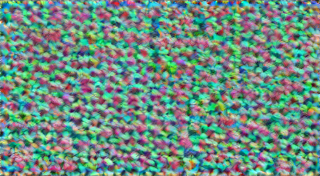

iter: 10, loss: 1.68149, losses: 0.848603, 0.832889
iter: 20, loss: 1.57325, losses: 0.794592, 0.778662


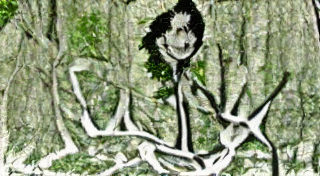

iter: 30, loss: 1.46137, losses: 0.741029, 0.720339
iter: 40, loss: 1.31029, losses: 0.673647, 0.636638


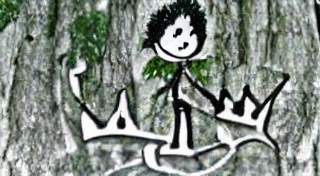

iter: 50, loss: 1.34278, losses: 0.684442, 0.658341
iter: 60, loss: 1.27203, losses: 0.660496, 0.611533


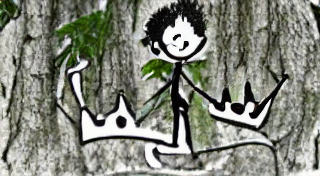

iter: 70, loss: 1.2429, losses: 0.641228, 0.601674
iter: 80, loss: 1.30723, losses: 0.673373, 0.633855


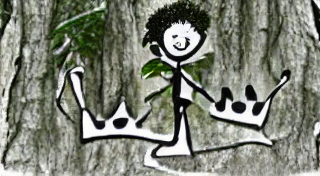

iter: 90, loss: 1.34075, losses: 0.690226, 0.650526
iter: 100, loss: 1.24309, losses: 0.639316, 0.603771


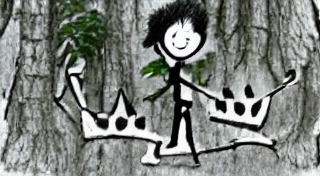

iter: 110, loss: 1.322, losses: 0.684505, 0.637496
iter: 120, loss: 1.32048, losses: 0.680416, 0.640065


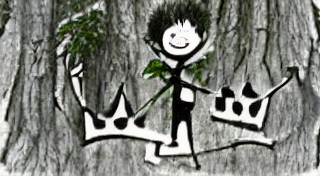

iter: 130, loss: 1.27222, losses: 0.657126, 0.615092
iter: 140, loss: 1.2075, losses: 0.627151, 0.580345


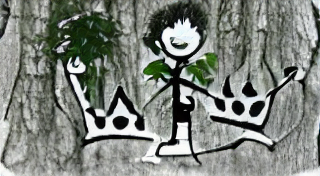

iter: 150, loss: 1.22344, losses: 0.632292, 0.591151
iter: 160, loss: 1.2131, losses: 0.624885, 0.588211


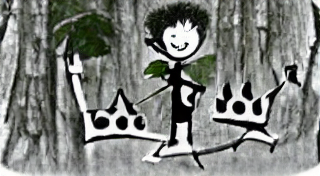

iter: 170, loss: 1.29051, losses: 0.663894, 0.62662
iter: 180, loss: 1.32835, losses: 0.686076, 0.642275


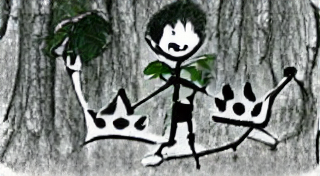

iter: 190, loss: 1.28118, losses: 0.663519, 0.617665
iter: 200, loss: 1.26435, losses: 0.652657, 0.611698


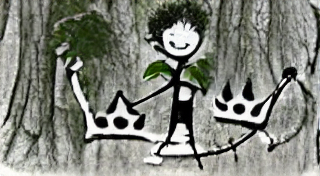

iter: 210, loss: 1.27917, losses: 0.659476, 0.619695
iter: 220, loss: 1.20169, losses: 0.625514, 0.576178


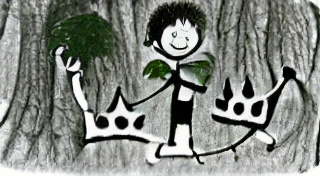

iter: 230, loss: 1.21001, losses: 0.623137, 0.586876
iter: 240, loss: 1.19454, losses: 0.620145, 0.574397


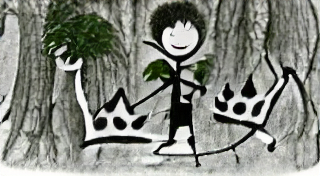

iter: 250, loss: 1.29421, losses: 0.659367, 0.63484
iter: 260, loss: 1.24864, losses: 0.645364, 0.603277


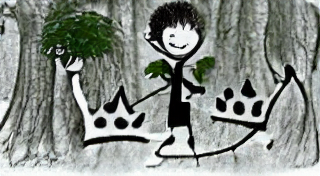

iter: 270, loss: 1.192, losses: 0.617839, 0.574162
iter: 280, loss: 1.27643, losses: 0.653929, 0.622499


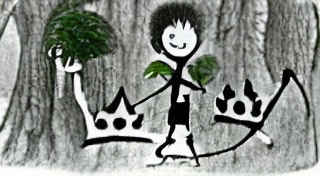

iter: 290, loss: 1.27217, losses: 0.653087, 0.619088
iter: 300, loss: 1.29099, losses: 0.657711, 0.633275


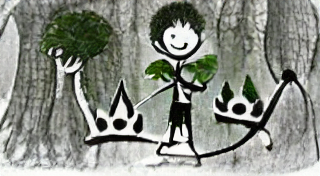

iter: 310, loss: 1.28587, losses: 0.664831, 0.621035
iter: 320, loss: 1.28874, losses: 0.656426, 0.632311


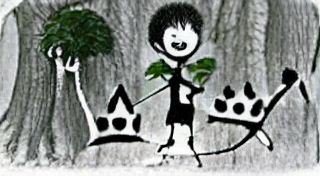

iter: 330, loss: 1.19822, losses: 0.615269, 0.582953
iter: 340, loss: 1.25937, losses: 0.646547, 0.612825


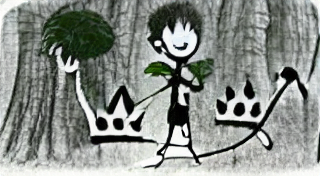

iter: 350, loss: 1.27496, losses: 0.656959, 0.618002


In [3]:
import clipit
# To reset settings to default
clipit.reset_settings()
# You can use "|" to separate multiple prompts
prompts = "(Black-and-white stick figure image) A young boy playing with a large, happy tree. He wears a crown of leaves and acts like the king of the forest."
# You can trade off speed for quality: draft, normal, better, best
quality = "normal"
# Aspect ratio: widescreen, square
aspect = "widescreen"
# Add settings
clipit.add_settings(prompts=prompts, quality=quality, aspect=aspect)
# Apply these settings and run
settings = clipit.apply_settings()
clipit.do_init(settings)
clipit.do_run(settings)